## Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE 

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

## Load dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Preprocessing

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# mengubah tipe data dari TotalCharges menjadi numerik
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
# TotalCharges memiliki 7032 rows non null values, karena jumlah yang tidak besar dan banyak maka memilih untuk menghapus rows kosong
df.dropna(inplace = True)

In [9]:
# Drop CustomerID karena tidak dibutuhkan
df.drop(['customerID'], axis =1, inplace =True)

In [10]:
# encode 1 untuk pria dan 0 untuk wanita
df.gender = [1 if each == "Male" else 0 for each in df.gender]

# encode 1 untuk Yes dan 0 untuk No, untuk kolom berikut

columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling', 
                      'Churn',
                      'MultipleLines']

# encode 1 untuk yes dan 0 untuk no

for item in columns_to_convert:
    df[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in df[item]]

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


0    5163
1    1869
Name: Churn, dtype: int64

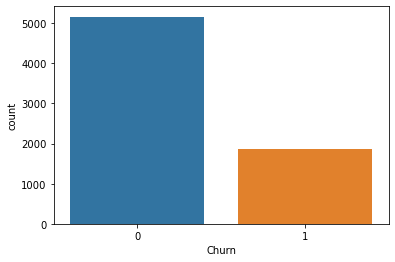

In [12]:
sns.countplot(x="Churn",data=df);
counts = df['Churn'].value_counts()
counts

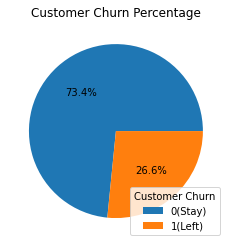

In [13]:
fig, ax = plt.subplots()
ax.pie(counts, autopct='%1.1f%%')
ax.legend(labels=['0(Stay)', '1(Left)'], title='Customer Churn',loc='lower right')
ax.set_title("Customer Churn Percentage")
plt.show()

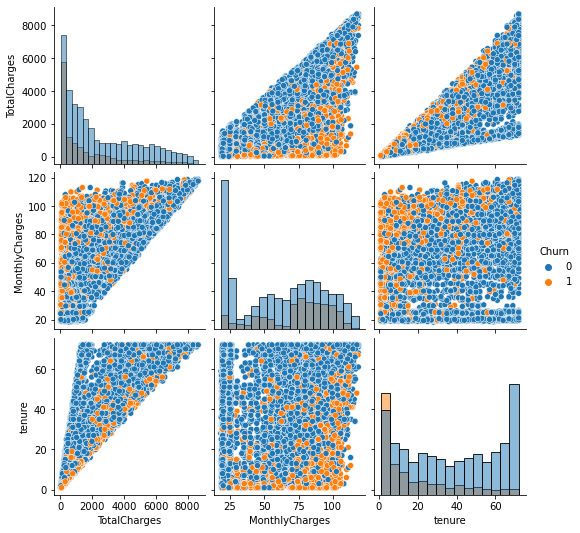

In [14]:
sns.pairplot(df,vars = ['TotalCharges','MonthlyCharges','tenure'], hue="Churn",diag_kind="hist")

In [15]:
counts = df['InternetService'].value_counts()
counts

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='InternetService', ylabel='count'>

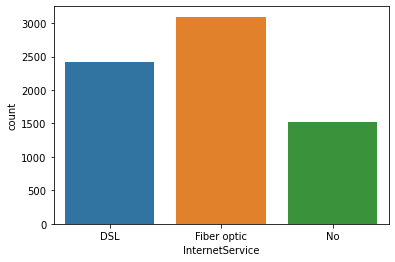

In [16]:
sns.set
sns.countplot(x="InternetService", data = df)

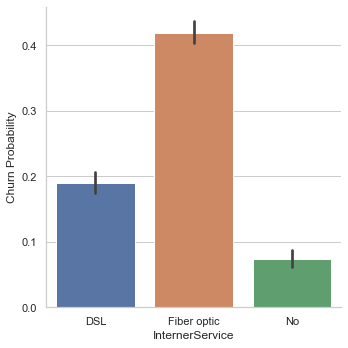

In [17]:
sns.set(style="whitegrid")
g1=sns.catplot(x="InternetService", y="Churn", data=df,kind="bar")
g1.set(xlabel='InternerService', ylabel = 'Churn Probability')
plt.show()

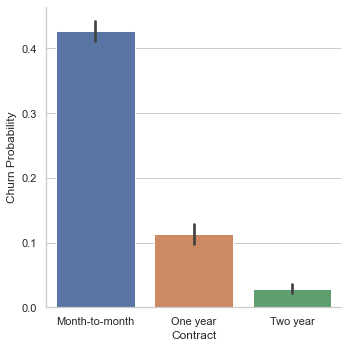

In [18]:
sns.set(style="whitegrid")
g1=sns.catplot(x="Contract", y="Churn", data=df,kind="bar")
g1.set(xlabel="Contract", ylabel = 'Churn Probability')
plt.show()

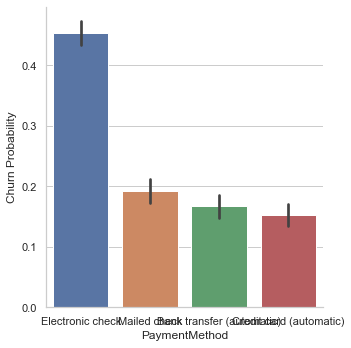

In [19]:
sns.set(style="whitegrid")
g1=sns.catplot(x="PaymentMethod", y="Churn", data=df,kind="bar")
g1.set(xlabel="PaymentMethod", ylabel = 'Churn Probability')
plt.show()

In [20]:
df = pd.get_dummies(data=df)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,-1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,-1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [21]:
df.corr()['Churn'].sort_values()

tenure                                    -0.354049
Contract_Two year                         -0.301552
InternetService_No                        -0.227578
TotalCharges                              -0.199484
Contract_One year                         -0.178225
Dependents                                -0.163128
Partner                                   -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
gender                                    -0.008545
PhoneService                               0.011691
OnlineSecurity                             0.023014
TechSupport                                0.026744
MultipleLines                              0.036148
OnlineBackup                               0.073934
DeviceProtection                           0.084402
SeniorCitizen                              0.150541
StreamingMov

## Modeling (Gunakan lebih min 2 model dan bandingkan hasil evaluasinya)

Bebas menggunakan model, mau menggunakan decision tree, random forest, xgboost, dll juga boleh<br><br>
silahkan berekspresi :)

### Data preparation training

In [22]:
# Assign X sebagai input and y sebagai output
y = df['Churn']
X = df.drop(['Churn'], axis=1)

In [23]:
#Split data into Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

### RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
y_predict1=model_rf.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.60      0.47      0.53       366

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



<AxesSubplot:>

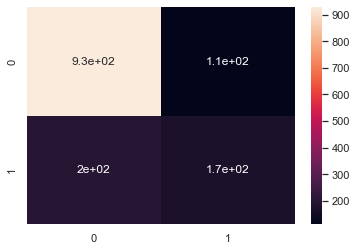

In [27]:
cm=confusion_matrix(y_test,y_predict1)
sns.heatmap(cm,annot=True)

In [28]:
### KNN Classifier (simple model)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier()
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [30]:
y_predict3=model_knn.predict(X_test)

In [31]:
print(classification_report(y_test,y_predict3))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1041
           1       0.56      0.45      0.50       366

    accuracy                           0.77      1407
   macro avg       0.69      0.66      0.67      1407
weighted avg       0.75      0.77      0.76      1407



<AxesSubplot:>

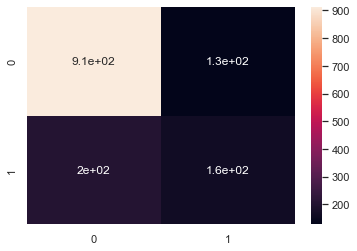

In [32]:
cm=confusion_matrix(y_test,y_predict3)
sns.heatmap(cm,annot=True)

### Decision Tree Classifier

In [33]:
# Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
y_predict5=model_dt.predict(X_test)

In [35]:
print(classification_report(y_test, y_predict5))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1041
           1       0.47      0.50      0.48       366

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.73      0.72      0.72      1407



<AxesSubplot:>

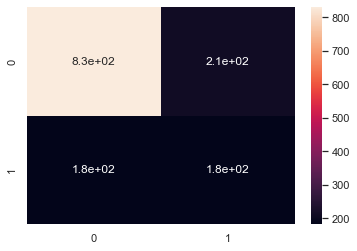

In [36]:
cm = confusion_matrix(y_test, y_predict5)
sns.heatmap(cm, annot = True)

### SUPPORT VECTOR MACHINE Classifier

In [37]:
# SUPPORT VECTOR MACHINE CLASSIFICATION
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svm=LinearSVC(max_iter=10000)
model_svm=CalibratedClassifierCV(model_svm)
model_svm.fit(X_train,y_train)

#Alternative method
#from sklearn import svm
#clf = svm.SVC(kernel='rbf')
#clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(max_iter=10000))

In [38]:
y_predict2=model_svm.predict(X_test)

In [39]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1041
           1       0.70      0.36      0.48       366

    accuracy                           0.79      1407
   macro avg       0.75      0.65      0.67      1407
weighted avg       0.78      0.79      0.77      1407



<AxesSubplot:>

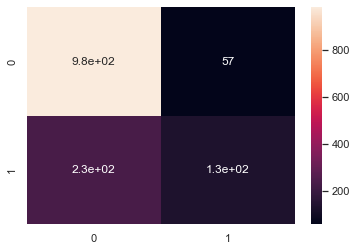

In [40]:
cm=confusion_matrix(y_test,y_predict2)
sns.heatmap(cm, annot=True)

### NAIVE BAYES Classifier

In [41]:
# NAIVE BAYES CLASSIFIER
from sklearn.naive_bayes import GaussianNB

model_gnb=GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [42]:
y_predict4=model_gnb.predict(X_test)

In [43]:
print(classification_report(y_test, y_predict4))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1041
           1       0.48      0.84      0.61       366

    accuracy                           0.72      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.81      0.72      0.74      1407



<AxesSubplot:>

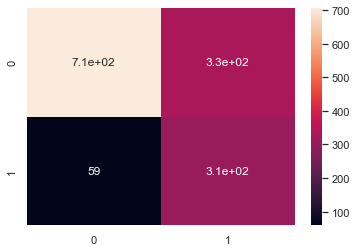

In [44]:
cm = confusion_matrix(y_test, y_predict4)
sns.heatmap(cm, annot = True)

In [45]:
# Print all results of each algorithm
print("Random Forest Classifier accuracy :", model_rf.score(X_test,y_test))
print("SVM accuracy :", model_svm.score(X_test,y_test))
print("KNN accuracy :", model_knn.score(X_test,y_test))
print("Naive Bayes accuracy :", model_gnb.score(X_test,y_test))
print("Decision Tree accuracy :", model_dt.score(X_test,y_test))

Random Forest Classifier accuracy : 0.7818052594171997
SVM accuracy : 0.7931769722814499
KNN accuracy : 0.7654584221748401
Naive Bayes accuracy : 0.720682302771855
Decision Tree accuracy : 0.7213930348258707


In [46]:
# Comparison of Classication_report across vaious machine leanirnig method
print("Random Forest Classifier(RFC):")
print("RFC:",classification_report(y_test, y_predict1))
print()
print("SVM:", classification_report(y_test, y_predict2))
print()
print("KNN:")
print(classification_report(y_test, y_predict3))
print()
print("Naive Bayes:")
print(classification_report(y_test, y_predict4))
print()
print("Decision Tree:")
print(classification_report(y_test, y_predict5))

Random Forest Classifier(RFC):
RFC:               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.60      0.47      0.53       366

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407


SVM:               precision    recall  f1-score   support

           0       0.81      0.95      0.87      1041
           1       0.70      0.36      0.48       366

    accuracy                           0.79      1407
   macro avg       0.75      0.65      0.67      1407
weighted avg       0.78      0.79      0.77      1407


KNN:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1041
           1       0.56      0.45      0.50       366

    accuracy                           0.77      1407
   macro avg       0.69      0.66      0.67      1407
weighted avg       0.75   

## Evaluation

pilih model yang terbaik performannya kemudian beri pejelasan kenapa model tersebut lebih baik dibandingkan dengan yang lain

In [47]:
# ROC curve
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_dt.predict_proba(X_test)[:, 1], pos_label = 1)

In [49]:
# AUC score

from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_dt.predict_proba(X_test)[:, 1])

In [51]:
print("Random Forest: ", auc_score1) 
print("Support Vector Machine: ", auc_score2)
print("K-Nearest Neighbors: ", auc_score3) 
print("Naive Bayes: ", auc_score4) 
print("Decision Tree: ", auc_score5) 

Random Forest:  0.8227534474522711
Support Vector Machine:  0.8455706734277151
K-Nearest Neighbors:  0.7559749715227582
Naive Bayes:  0.8281116307879667
Decision Tree:  0.6497850427552323


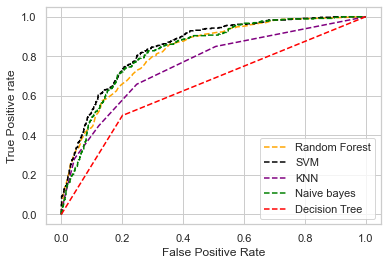

In [52]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Random Forest")
plt.plot(fpr2, tpr2, linestyle = "--", color = "black", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "purple", label = "KNN")
plt.plot(fpr4, tpr4, linestyle = "--", color = "green", label = "Naive bayes")
plt.plot(fpr5, tpr5, linestyle = "--", color = "red", label = "Decision Tree")

#plt.title("Receiver Operator Characteristics ROC")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

Conclusion :
* Support Vector Machine adalah model machine learning yang paling baik karena menghasilkan nilai AUC dan F1 Score paling tinggi. Namun demikian, Decision tree merupakan model yang paling tidak dianjurkan untuk digunakan karena nila AUC paling rendah.